In [106]:
import pandas as pd
import seaborn as sns
import re
sns.set(style="darkgrid")


from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16,8

In [107]:
df_player = pd.read_csv("../player.csv")
df_history = pd.read_csv("../player_history.csv")

re_girls = re.compile(r"u\d+t")

def league_to_classification(name):
    s = name.lower()
    if "naiste" in s:
        return "naised"
    elif "neiud" in s or re_girls.search(s) is not None:
        return "tüdrukud"
    elif "u1" in s:
        return "poisid"
    else:
        return "mehed"

df_history["league_type"] = df_history["league_name"].map(league_to_classification)

print(f"{df_player.shape[0]} players, {df_history.shape[0]} history items")
df_history["league_name"].unique()

3124 players, 17652 history items


array(['Naiste liiga', 'Naiste esiliiga', 'Naiste liiga 5-9 koht',
       'Naiste esiliiga karikavõistlused - A', 'U19 neiud',
       'U19 neiud - karikavõistlused', 'PAF Naiste liiga',
       'Naiste esiliiga karikavõistlused - B', 'PAF Saalihokiliiga',
       'Meistriliiga', 'Esiliiga', 'Eesti karikas 2013', 'Esiliiga - B',
       'Esiliiga 7-13 koht', 'Esiliiga - A', 'Esiliiga 1-9 koht',
       'Meistriliiga-B', 'Esiliiga 1-6 koht', 'Esiliiga 10-15 koht',
       'Teine liiga - põhi/lääs', 'Teine liiga - lõuna/ida',
       'Esiliiga - D', 'Eesti koondise mängud', 'U19',
       'U19 - karikavõistlused', 'PAF Teine liiga', 'Teine liiga',
       'Esiliiga 1-8 koht', 'TESTLIIGA', 'Esiliiga - C', 'Raplamaa MV',
       'Esiliiga 9-14 koht', 'U17 - põhjagrupp', 'U17',
       'U17 - karikavõistlused', 'U17 - karikavõistlused 2013/2014',
       'U17 - lõunagrupp', 'U15 - lõunagrupp', 'U15 A - karikavõistlused',
       'U13 - lõunagrupp', 'U13 A - karikavõistlused', 'U15 - põhjagrupp',
       

In [108]:
df_player.head()

,player_id,name,birthday,item
0,12,Riive Tamm,17.11.1974,player_item
1,17,Ela Vulla,16.12.1979,player_item
2,18,Kaidi Aosaar,28.05.1987,player_item
3,19,Kert Jusar,14.04.1982,player_item
4,11,Triinu Saluste,04.02.1993,player_item


In [109]:
df_history.head()

,season,team,player_id,item,league_name,n_games,n_goals,n_passes,league_type
0,2011 / 2012,Tamsalu EBE,12,player_history_item,Naiste liiga,14,0,1,naised
1,2014 / 2015,Team PPT,17,player_history_item,Naiste esiliiga,8,2,3,naised
2,2011 / 2012,Tamsalu EBE,17,player_history_item,Naiste liiga,14,1,1,naised
3,2017 / 2018,Arenculle,18,player_history_item,Naiste esiliiga,4,0,0,naised
4,2016 / 2017,Arenculle,18,player_history_item,Naiste esiliiga,0,0,0,naised


[Text(0, 0.5, '# of player-games'), (0.0, 12804.75)]

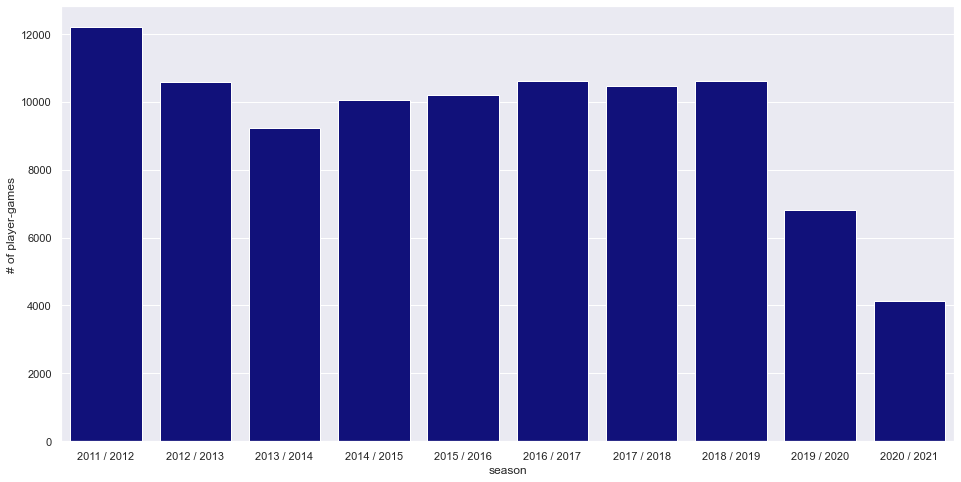

In [110]:
# Player-games by season
#sns.histplot(data=df_history, x="season")
pg_by_season = df_history.groupby(["season"]).sum()[["n_games"]].reset_index()
pg_by_season
ax = sns.barplot(data=pg_by_season, x="season", y="n_games", color="darkblue")
ax.set(ylabel='# of player-games', ylim=(0, None))

# Leagues

<AxesSubplot:xlabel='season', ylabel='n_games'>

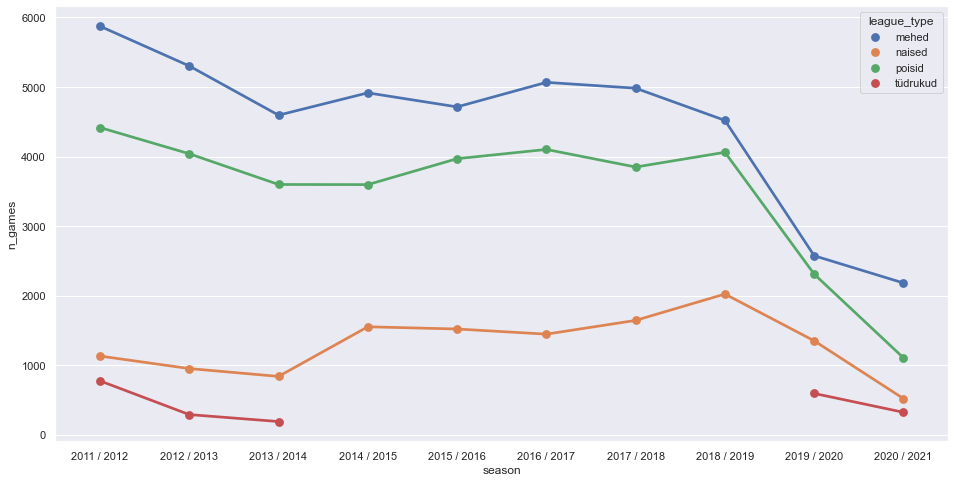

In [111]:
pg_by_league_type = df_history.groupby(["season", "league_type"]).sum()[["n_games"]].reset_index()
pg_by_league_type

sns.pointplot(data=pg_by_league_type, x="season", y="n_games", hue="league_type")

## Active players

In [112]:
games_by_season = df_history.groupby(["player_id", "season"]).sum()[["n_games"]].reset_index()

In [113]:
players_by_season = games_by_season.groupby(["season"]).count()["player_id"].reset_index()
p5_by_season = games_by_season[games_by_season["n_games"] >= 5]

players_by_season["condition"] = "registered"
p5_by_season_result = p5_by_season.groupby(["season"]).count()["player_id"].reset_index()
p5_by_season_result["condition"] = ">=5 games"

counts_by_season = pd.concat([players_by_season, p5_by_season_result]).reset_index(drop=True)

counts_by_season

,season,player_id,condition
0,2011 / 2012,1136,registered
1,2012 / 2013,1037,registered
2,2013 / 2014,953,registered
3,2014 / 2015,938,registered
4,2015 / 2016,1052,registered
5,2016 / 2017,980,registered
6,2017 / 2018,938,registered
7,2018 / 2019,993,registered
8,2019 / 2020,891,registered
9,2020 / 2021,842,registered


[Text(0, 0.5, '# of players'), (0.0, 1174.6)]

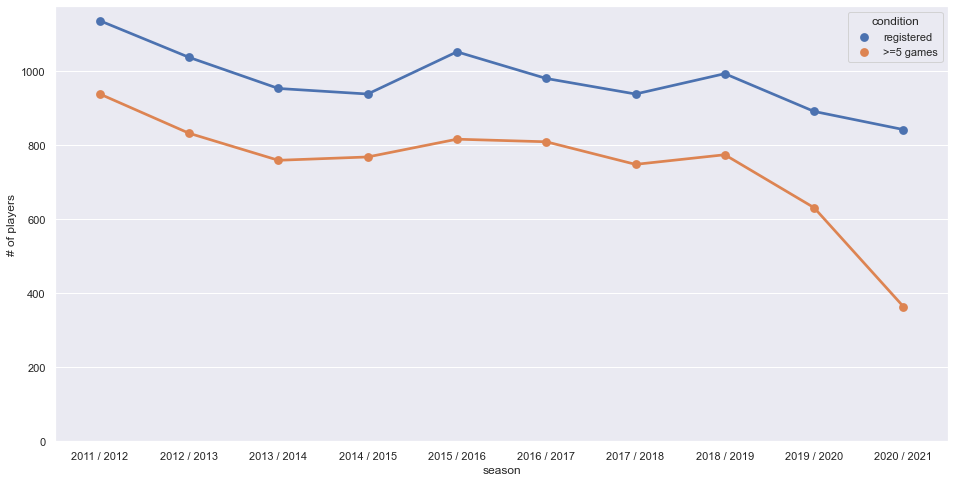

In [114]:
ax = sns.pointplot(data=counts_by_season, x="season", y="player_id", hue="condition")
ax.set(ylabel='# of players', ylim=(0, None))

# Ages

In [115]:
df_joined = df_history.merge(df_player, on="player_id")

def age_in_season(row):
    season_year = int(row.season[:4])
    birth_year = int(row.birthday[6:])
    
    return season_year-birth_year

df_joined["age_in_season"] = df_joined.apply(age_in_season, axis=1)

In [118]:
df_age = df_joined.groupby(["season", "player_id"]).max()["age_in_season"].reset_index()
df_age_league_type = df_joined.groupby(["season", "player_id", "league_type"]).max()["age_in_season"].reset_index()

[(0.0, 25.0)]

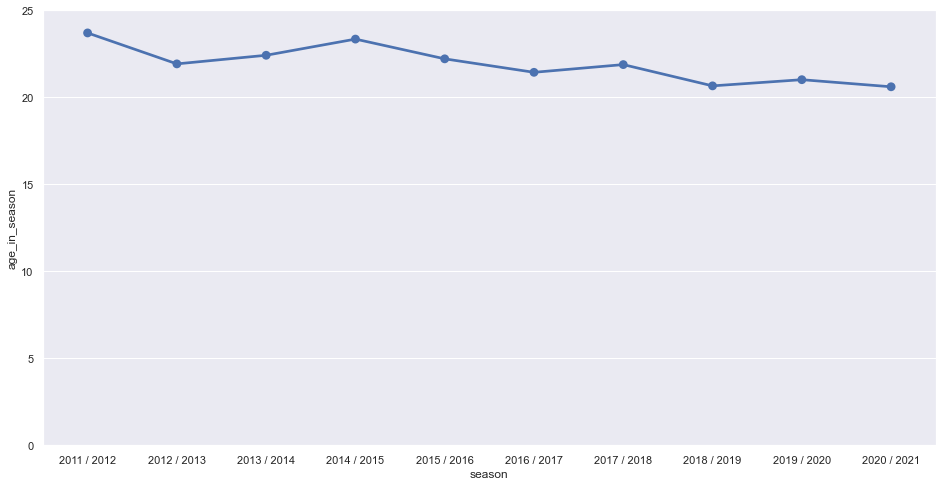

In [119]:
mean_age_by_season = df_age.groupby("season").mean()["age_in_season"].reset_index()
ax = sns.pointplot(data=mean_age_by_season, x="season", y="age_in_season")
ax.set(ylim=(0, 25))

[(0.0, 29.844469762285993)]

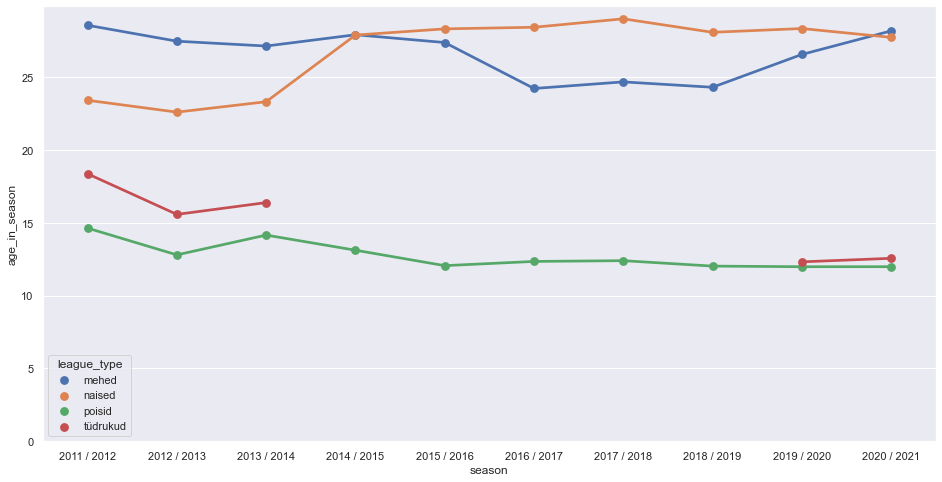

In [129]:
mean_age_by_season_league_type = df_age_league_type.groupby(["season", "league_type"]).mean()["age_in_season"].reset_index()
ax = sns.pointplot(data=mean_age_by_season_league_type, x="season", y="age_in_season", hue="league_type")
ax.set(ylim=(0, None))